<a href="https://colab.research.google.com/github/gloriagutierrez2025/Challenger_segunda_parte/blob/main/Challenger_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTACION LIBRERIAS**

In [526]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

**EXTRACCION DE DATOS**

In [436]:
datos=pd.read_csv('/content/dataset_limpio.csv')

In [437]:
datos.head()

,ID,cancelo,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


In [438]:
datos=datos.drop(columns='ID')

In [439]:
datos.columns

Index(['cancelo', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [440]:
datos.rename(columns={
    'cancelo': 'cancelacion',
    'customer_gender': 'genero',
    'customer_SeniorCitizen': 'adulto_mayor',
    'customer_Partner': 'tiene_pareja',
    'customer_Dependents': 'tiene_dependientes',
    'customer_tenure': 'antiguedad_meses',
    'phone_PhoneService': 'servicio_telefonico',
    'phone_MultipleLines': 'lineas_multiples',
    'internet_InternetService': 'servicio_internet',
    'internet_OnlineSecurity': 'seguridad_en_linea',
    'internet_OnlineBackup': 'respaldo_en_linea',
    'internet_DeviceProtection': 'proteccion_dispositivo',
    'internet_TechSupport': 'soporte_tecnico',
    'internet_StreamingTV': 'streaming_tv',
    'internet_StreamingMovies': 'streaming_peliculas',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'facturacion_electronica',
    'account_PaymentMethod': 'metodo_pago',
    'account_Charges_Day': 'total_dia',
    'account_Charges_Monthly': 'cargo_mensual',
    'account_Charges_Total': 'cargo_total'
}, inplace=True)

**EXPLORACION DE DATOS**

In [441]:
df=datos
df

,cancelacion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefonico,lineas_multiples,servicio_internet,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90
7039,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70
7040,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7041,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [442]:
df.shape

(7043, 20)

In [443]:
px.histogram(datos, x = 'cancelacion', text_auto = True)

In [444]:
px.histogram(datos, x = 'genero', text_auto = True, color = 'cancelacion', barmode = 'group')

In [445]:
px.histogram(datos, x = 'adulto_mayor', text_auto = True, color = 'cancelacion', barmode = 'group')

In [446]:
px.histogram(datos, x = 'tiene_pareja', text_auto = True, color = 'cancelacion', barmode = 'group')

In [447]:
px.histogram(datos, x = 'tiene_dependientes', text_auto = True, color = 'cancelacion', barmode = 'group')

In [448]:
px.histogram(datos, x = 'antiguedad_meses', text_auto = True, color = 'cancelacion', barmode = 'group')

In [449]:
px.histogram(datos, x = 'servicio_telefonico', text_auto = True, color = 'cancelacion', barmode = 'group')

In [450]:
px.histogram(datos, x = 'seguridad_en_linea', text_auto = True, color = 'cancelacion', barmode = 'group')

In [451]:
px.histogram(datos, x = 'respaldo_en_linea', text_auto = True, color = 'cancelacion', barmode = 'group')

In [452]:
px.histogram(datos, x = 'proteccion_dispositivo', text_auto = True, color = 'cancelacion', barmode = 'group')

In [453]:
px.histogram(datos, x = 'soporte_tecnico', text_auto = True, color = 'cancelacion', barmode = 'group')

In [454]:
px.histogram(datos, x = 'streaming_tv', text_auto = True, color = 'cancelacion', barmode = 'group')

In [455]:
px.histogram(datos, x = 'streaming_peliculas', text_auto = True, color = 'cancelacion', barmode = 'group')

In [456]:
px.histogram(datos, x = 'tipo_contrato', text_auto = True, color = 'cancelacion', barmode = 'group')

In [457]:
px.histogram(datos, x = 'facturacion_electronica', text_auto = True, color = 'cancelacion', barmode = 'group')

In [458]:
px.histogram(datos, x = 'metodo_pago', text_auto = True, color = 'cancelacion', barmode = 'group')

In [459]:
px.histogram(datos, x = 'cargo_mensual', text_auto = True, color = 'cancelacion', barmode = 'group')

In [460]:
px.histogram(datos, x = 'cargo_total', text_auto = True, color = 'cancelacion', barmode = 'group')

In [462]:
px.box(datos, x = 'antiguedad_meses', color = 'cancelacion')

**SEPARANDO VARIABLES X -Y**

In [358]:
print(df.columns.tolist())

['cancelacion', 'genero', 'adulto_mayor', 'tiene_pareja', 'tiene_dependientes', 'antiguedad_meses', 'servicio_telefonico', 'lineas_multiples', 'servicio_internet', 'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'tipo_contrato', 'facturacion_electronica', 'metodo_pago', 'cargo_mensual', 'cargo_total']


In [360]:
y = df["cancelacion"]

In [463]:
X = df.drop(columns=["cancelacion"])

In [464]:
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
num_cols = X.select_dtypes(include="number").columns.tolist()

In [465]:
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
], remainder="passthrough")

In [466]:
model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000))
])

In [467]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [468]:
model.fit(X_train, y_train)
print("Score en test:", model.score(X_test, y_test))

Score en test: 0.7927608232789212


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**PROPORCION CLIENTES QUE CANCELARON Y LOS QUE SE MANTIENEN ACTIVOS**

In [469]:
conteo = df["cancelacion"].value_counts()
print(conteo)

cancelacion
0    5174
1    1869
Name: count, dtype: int64


In [470]:
proporcion = df["cancelacion"].value_counts(normalize=True) * 100
print(proporcion)

cancelacion
0    73.463013
1    26.536987
Name: proportion, dtype: float64


**Evaluando si hay desbalance**

In [471]:
if proporcion.min() < 40:
    print("Existe desbalance de clases")
else:
    print("Las clases están balanceadas")

Existe desbalance de clases


**Normalizando**


In [472]:
candidates_by_name = [c for c in df.columns if any(k in c.lower() for k in ['cancel','cancelo','cancelacion'])]
binary_cols = [c for c in df.columns if set(df[c].dropna().unique()).issubset({0,1})]

target_col = None
if candidates_by_name:
    for c in candidates_by_name:
        if c in binary_cols:
            target_col = c
            break
    if target_col is None:
        target_col = candidates_by_name[0]
elif binary_cols:
    target_col = binary_cols[0]
else:
    two_val = [c for c in df.columns if df[c].nunique(dropna=False)==2]
    if two_val:
        target_col = two_val[0]

if target_col is None:
    raise RuntimeError("No se detectó columna objetivo binaria automáticamente. Indica el nombre exacto de la columna objetivo.")

print("Columna objetivo detectada:", target_col)

Columna objetivo detectada: cancelacion


In [473]:
id_cols = [c for c in df.columns if ("id" in c.lower() or "ident" in c.lower()) and c != target_col]
if id_cols:
    print("Se removerán columnas identificador:", id_cols)

y = df[target_col].copy()
X = df.drop(columns=[target_col] + id_cols, errors="ignore")

Se removerán columnas identificador: ['seguridad_en_linea']


In [474]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
bool_cols = X.select_dtypes(include=["bool"]).columns.tolist()
num_cols_all = X.select_dtypes(include=[np.number]).columns.tolist()

In [475]:
if bool_cols:
    X[bool_cols] = X[bool_cols].astype("uint8")
    num_cols_all = list(set(num_cols_all + bool_cols))

In [476]:
binary_numerical = [c for c in num_cols_all if set(X[c].dropna().unique()).issubset({0,1})]
continuous_cols = [c for c in num_cols_all if c not in binary_numerical]

In [477]:
print("Categóricas detectadas:", cat_cols)
print("Numéricas binarias (no normalizar):", binary_numerical)
print("Continuas a normalizar (MinMax):", continuous_cols)

Categóricas detectadas: ['genero', 'lineas_multiples', 'servicio_internet', 'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'tipo_contrato', 'metodo_pago']
Numéricas binarias (no normalizar): ['adulto_mayor', 'tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'facturacion_electronica']
Continuas a normalizar (MinMax): ['antiguedad_meses', 'cargo_mensual', 'cargo_total']


In [478]:
if continuous_cols:
    rangos_antes = pd.DataFrame({"min": X[continuous_cols].min(), "max": X[continuous_cols].max()})
    print("\nRangos ANTES (continuas):\n", rangos_antes)


Rangos ANTES (continuas):
                     min      max
antiguedad_meses   0.00    72.00
cargo_mensual     18.25   118.75
cargo_total       18.80  8684.80


In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nShapes: X_train, X_test:", X_train.shape, X_test.shape)


Shapes: X_train, X_test: (5634, 18) (1409, 18)


In [480]:
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    # versiones antiguas de sklearn usan 'sparse' en lugar de 'sparse_output'
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [481]:
transformers = []
if continuous_cols:
    transformers.append(("num", MinMaxScaler(), continuous_cols))
if cat_cols:
    transformers.append(("cat", ohe, cat_cols))

preprocessor = ColumnTransformer(transformers=transformers, remainder="drop")

In [380]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['antiguedad_meses', 'cargo_mensual',
                                  'cargo_total']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['genero', 'lineas_multiples',
                                  'servicio_internet', 'respaldo_en_linea',
                                  'proteccion_dispositivo', 'soporte_tecnico',
                                  'streaming_tv', 'streaming_peliculas',
                                  'tipo_contrato', 'metodo_pago'])])

In [381]:
X_train_t = preprocessor.transform(X_train)
X_test_t  = preprocessor.transform(X_test)

In [482]:
feature_names = []
if continuous_cols:
    feature_names.extend(continuous_cols)
if cat_cols:
    # obtener nombres OHE (compatible con distintas versiones)
    try:
        cat_names = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols).tolist()
    except Exception:
        # Si no está disponible, crear nombres manuales (menos ideal)
        cat_names = []
        for c in cat_cols:
            uniques = X_train[c].astype(str).unique().tolist()
            cat_names.extend([f"{c}__{str(u)}" for u in uniques])
    feature_names.extend(cat_names)

In [483]:
X_train_t_df = pd.DataFrame(X_train_t, columns=feature_names, index=X_train.index).reset_index(drop=True)
X_test_t_df  = pd.DataFrame(X_test_t,  columns=feature_names, index=X_test.index).reset_index(drop=True)

In [484]:
if continuous_cols:
    rangos_despues = pd.DataFrame({
        "min_after": X_train_t_df[continuous_cols].min().round(6),
        "max_after": X_train_t_df[continuous_cols].max().round(6)
    })
    print("\nRangos DESPUÉS (continuas, train):\n", rangos_despues)


Rangos DESPUÉS (continuas, train):
                   min_after  max_after
antiguedad_meses        0.0        1.0
cargo_mensual           0.0        1.0
cargo_total             0.0        1.0


**CORRELACION Y SELECCION DE VARIABLES**

In [506]:
df_num = df.select_dtypes(include=["int64", "float64"])
print("Columnas numéricas:\n", df_num.columns.tolist())

Columnas numéricas:
 ['cancelacion', 'adulto_mayor', 'tiene_pareja', 'tiene_dependientes', 'antiguedad_meses', 'servicio_telefonico', 'facturacion_electronica', 'cargo_mensual', 'cargo_total']


In [486]:
corr_matrix = df_num.corr()

**Los clientes que tienen más antiguedad, muestran una correlación -0,35 lo que refleja que tienden a cancelar menos en comparación con quienes llevan menos tiempo**

In [388]:
print(corr_matrix["cancelacion"].sort_values(ascending=False))

cancelacion                1.000000
cargo_mensual              0.193356
facturacion_electronica    0.191825
adulto_mayor               0.150889
servicio_telefonico        0.011942
tiene_pareja              -0.150448
tiene_dependientes        -0.164221
cargo_total               -0.199428
antiguedad_meses          -0.352229
Name: cancelacion, dtype: float64


/tmp/ipython-input-2309284199.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Relación entre Antigüedad (tenure) y Cancelación')

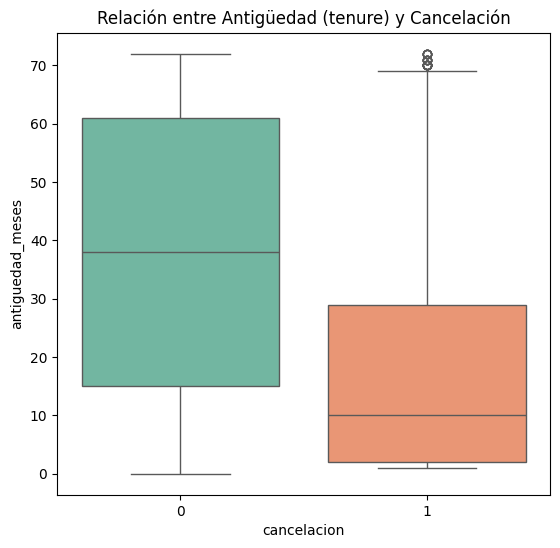

In [487]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x="cancelacion", y="antiguedad_meses", data=df, palette="Set2")
plt.title("Relación entre Antigüedad (tenure) y Cancelación")



/tmp/ipython-input-1427299535.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




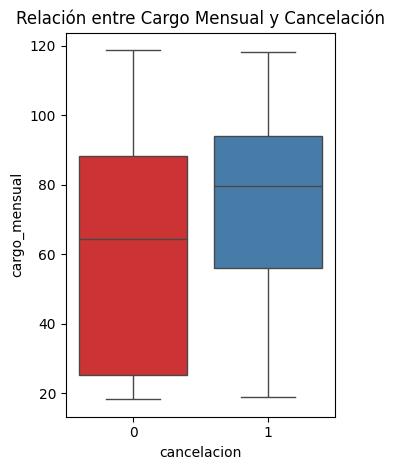

In [488]:
plt.subplot(1,2,2)
sns.boxplot(x="cancelacion", y="cargo_mensual", data=df, palette="Set1")
plt.title("Relación entre Cargo Mensual y Cancelación")
plt.tight_layout()
plt.show()

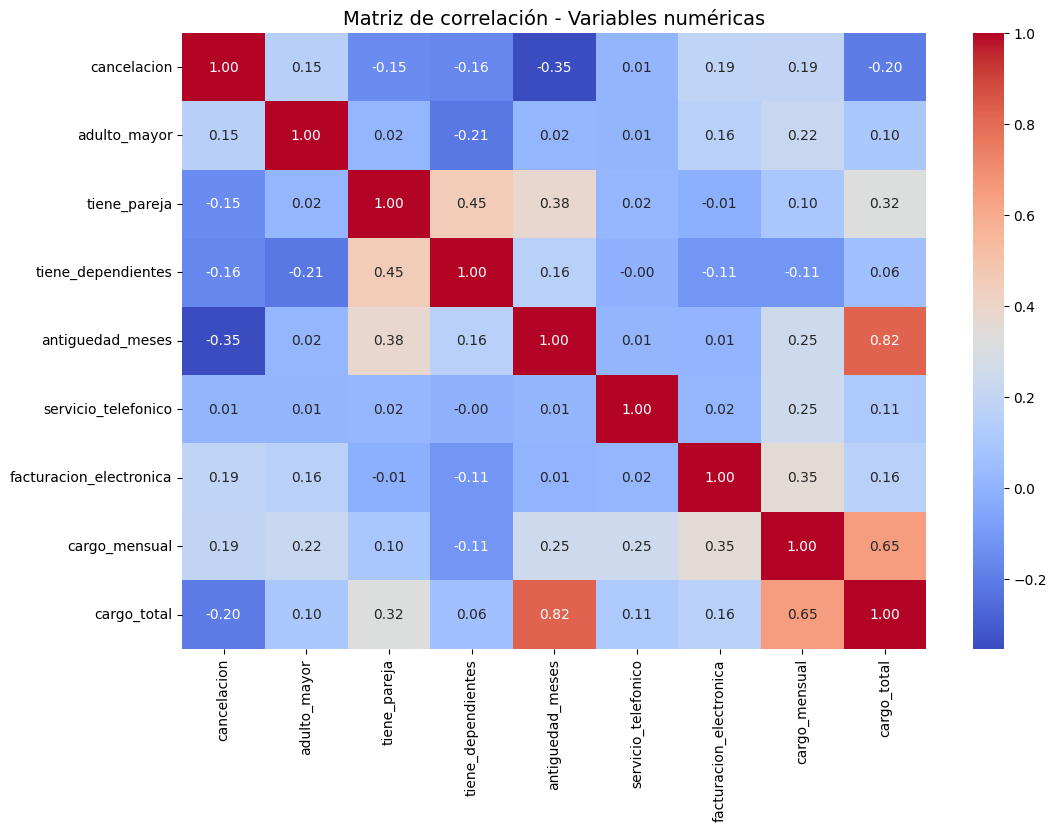

In [489]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación - Variables numéricas", fontsize=14)
plt.show()

**MODELADO**

In [400]:
dummy = DummyClassifier()

In [490]:
dummy.fit(X_train, y_train)

DummyClassifier()

In [491]:
dummy.score(X_test, y_test)

0.7345635202271115

In [415]:
X = df.drop(columns=["cancelacion"])
y = df["cancelacion"]

In [500]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [501]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [502]:
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [503]:
score = arbol.score(X_test, y_test)
print("Accuracy en test:", score)

Accuracy en test: 0.7295954577714692


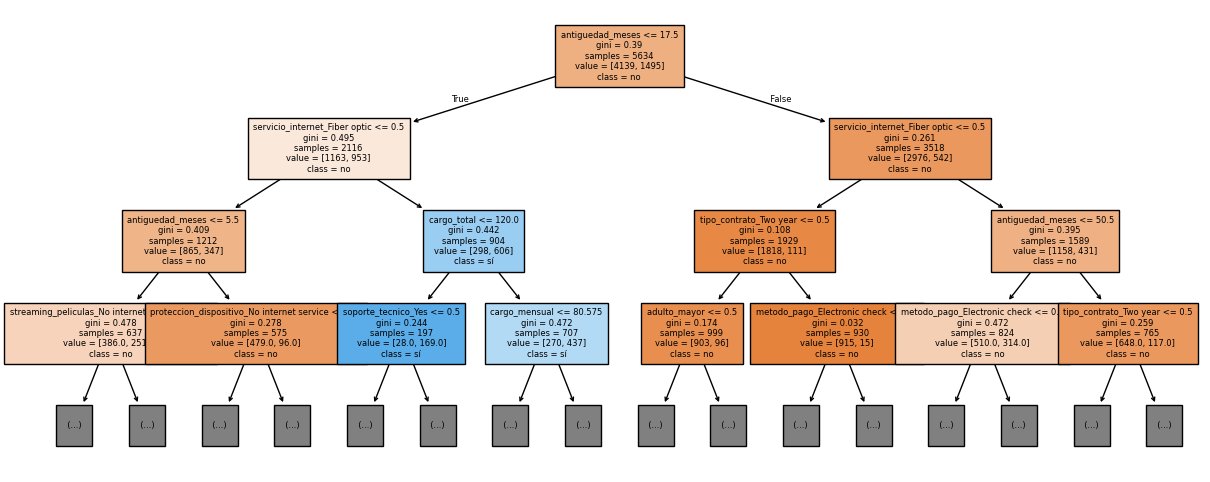

In [504]:
plt.figure(figsize=(15, 6))
plot_tree(
    arbol,
    filled=True,
    class_names=['no', 'sí'],         # etiquetas de salida
    feature_names=X_encoded.columns,  # nombres de variables
    fontsize=6,
    max_depth=3                       # 👈 límite de profundidad mostrado
)
plt.show()

In [507]:
print(df.columns)

Index(['cancelacion', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'antiguedad_meses', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_en_linea',
       'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'tipo_contrato',
       'facturacion_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total'],
      dtype='object')


In [513]:
X = df[['antiguedad_meses', 'cargo_total', 'cargo_mensual']]
y = df['cancelacion']

*Grupo de entrenamiento y prueba*

In [516]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

*Normalizando*

In [517]:
normalizacion = MinMaxScaler()

In [518]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Entrenar modelo*

In [521]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

*Evaluar*

In [522]:
y_pred = modelo.predict(X_test_scaled)

In [525]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[1361  201]
 [ 297  254]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1562
           1       0.56      0.46      0.50       551

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.75      0.76      0.76      2113



*Desbalanceando*

In [528]:
print(df.columns)

Index(['cancelacion', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'antiguedad_meses', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_en_linea',
       'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'tipo_contrato',
       'facturacion_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total'],
      dtype='object')


*Seleccionamos variables explicativas y objetivo*

In [529]:
X = df[['antiguedad_meses', 'cargo_total', 'cargo_mensual']]
y = df['cancelacion']

*Dividir en entrenamiento y prueba*

In [530]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

*Normalizamos variables*

In [531]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Aplicamos Smote solo al conjunto de entrenamiento*

In [532]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

*Entrenamos modelo con datos balanceados*

In [533]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

*Hacemos predicciones en el conjunto de prueba*

In [534]:
y_pred = modelo.predict(X_test_scaled)

*Evaluamos el modelo*

In [535]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[1249  303]
 [ 247  314]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1552
           1       0.51      0.56      0.53       561

    accuracy                           0.74      2113
   macro avg       0.67      0.68      0.68      2113
weighted avg       0.75      0.74      0.74      2113



*Proporción de clases antes de aplicar SMOTE*

Text(0, 0.5, 'Cantidad')

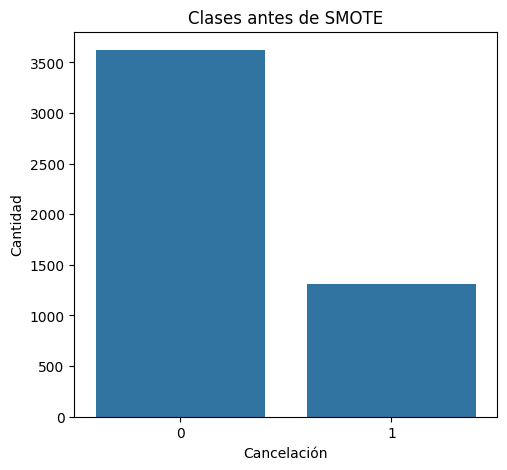

In [536]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Clases antes de SMOTE")
plt.xlabel("Cancelación")
plt.ylabel("Cantidad")

*Proporción de clases después de aplicar SMOTE*

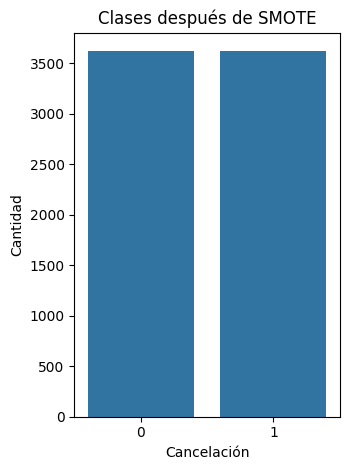

In [537]:
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_bal)
plt.title("Clases después de SMOTE")
plt.xlabel("Cancelación")
plt.ylabel("Cantidad")

plt.tight_layout()
plt.show()